In [252]:
# load library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load data by ceating a wrangle fun

In [303]:
# define wrangle fun
def wrangle(file_path):
    #load data
    data=pd.read_csv(file_path,index_col=False,encoding='latin1')
    #set index 'ORDERNUMBER'
    data.set_index(keys='ORDERNUMBER',inplace=True)
    # DATA CLEANING
    data['ORDERDATE'].dtype
    #convert 'orderdate' object to datetime
    data['ORDERDATE']=pd.to_datetime(data['ORDERDATE'],errors='coerce')
    # fill 'postalcode' null values with 0
    data['POSTALCODE']=data['POSTALCODE'].fillna(0)
    # check duplicates rows
    data.duplicated().count() 
    # drop duplicate rows
    data.drop_duplicates(inplace=True,keep= 'first')
    # check null values
    data.isnull().sum() 
    # drop column with more than 50% null values
    data.drop(columns=['ADDRESSLINE2'],inplace=True)
    # fill na values
    data.fillna({'STATE':'missing'},inplace=True)
    data.fillna({'TERRITORY':'missing'},inplace=True)
    # drop unnecessary columns
    data.drop(columns=['ADDRESSLINE1','POSTALCODE','CONTACTLASTNAME','CONTACTFIRSTNAME','ORDERLINENUMBER','PHONE'],inplace=True,axis=1)
    #remove outliar from sales column
    data=data[data['SALES'] < 12000]
    #total revenure
    data['REVENURE'] = data['PRICEEACH'] * data['QUANTITYORDERED']
    data.rename(columns={'REVENURE':'REVENUE'},inplace=True)

    print(data.head())

   
    

In [304]:
wrangle('sales_data_sample.csv')

             QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE   STATUS  QTR_ID  \
ORDERNUMBER                                                                    
10107                     30      95.70  2871.00 2003-02-24  Shipped       1   
10121                     34      81.35  2765.90 2003-05-07  Shipped       2   
10134                     41      94.74  3884.34 2003-07-01  Shipped       3   
10145                     45      83.26  3746.70 2003-08-25  Shipped       3   
10159                     49     100.00  5205.27 2003-10-10  Shipped       4   

             MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE  \
ORDERNUMBER                                                     
10107               2     2003  Motorcycles    95    S10_1678   
10121               5     2003  Motorcycles    95    S10_1678   
10134               7     2003  Motorcycles    95    S10_1678   
10145               8     2003  Motorcycles    95    S10_1678   
10159              10     2003  Motorcycles    95

In [193]:
#IMPORT DATASET
data=pd.read_csv('sales_data_sample.csv',index_col=False,encoding='latin1')
#set index 'ORDERNUMBER'
data.set_index(keys='ORDERNUMBER',inplace=True)
# show first 5 rows
print(data.head())

             QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
ORDERNUMBER                                                         
10107                     30      95.70                2  2871.00   
10121                     34      81.35                5  2765.90   
10134                     41      94.74                2  3884.34   
10145                     45      83.26                6  3746.70   
10159                     49     100.00               14  5205.27   

                   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  \
ORDERNUMBER                                                                     
10107         2/24/2003 0:00  Shipped       1         2     2003  Motorcycles   
10121          5/7/2003 0:00  Shipped       2         5     2003  Motorcycles   
10134          7/1/2003 0:00  Shipped       3         7     2003  Motorcycles   
10145         8/25/2003 0:00  Shipped       3         8     2003  Motorcycles   
10159        10/10/2003 0:00  

In [126]:
#EXPLORE DATASET
print(data.info()) 
'''2823 total entries, 24 columns ,few null values,column data type need to be change'''
#check data types 
print(data.dtypes) #orderdate obj,productcode object
#list all column names
print(data.columns) 

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   object 


'''total 2823 entries, 24 columns,dtype orderdate object ,dtype productcode object,
column with null values addressline2 2521,state 1486,postalcode 76 ,territory 1074'''

In [194]:
#count null values for each col
print(data['ADDRESSLINE2'].isnull().sum(), 
      data['STATE'].isnull().sum(), 
      data['POSTALCODE'].isnull().sum(), 
      data['TERRITORY'].isnull().sum())

2521 1486 76 1074


In [195]:
# DATA CLEANING
data['ORDERDATE'].dtype
#convert 'orderdate' object to datetime
data['ORDERDATE']=pd.to_datetime(data['ORDERDATE'],errors='coerce')
# fill 'postalcode' null values with 0
data['POSTALCODE']=data['POSTALCODE'].fillna(0)
data['POSTALCODE']

ORDERNUMBER
10107    10022
10121    51100
10134    75508
10145    90003
10159        0
         ...  
10350    28034
10373    90110
10386    28034
10397    31000
10414    51003
Name: POSTALCODE, Length: 2823, dtype: object

In [196]:
# check duplicates rows
data.duplicated().count() 
# drop duplicate rows
data.drop_duplicates(inplace=True,keep= 'first')
data

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,0,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium


In [203]:
# check null values
data.isnull().sum() 
# drop column with more than 50% null values
data.drop(columns=['ADDRESSLINE2'],inplace=True)

In [230]:
# fill na values
data.fillna({'STATE':'missing'},inplace=True)
data.fillna({'TERRITORY':'missing'},inplace=True)
'''dnt need to drop null values other wise we would lost our more than 50 % data.'''
# drop unnecessary columns
data.drop(columns=['ADDRESSLINE1','POSTALCODE','CONTACTLASTNAME','CONTACTFIRSTNAME','ORDERLINENUMBER'],inplace=True,axis=1)
data.drop(columns='PHONE',inplace=True,axis=1)

In [231]:
#recheck columns
data.columns
#productcode,phone,

Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE', 'STATUS',
       'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'CUSTOMERNAME', 'CITY', 'STATE', 'COUNTRY', 'TERRITORY', 'DEALSIZE'],
      dtype='object')

In [236]:
# descriptive statistics
data.describe()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,6.000000,26.880000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,9.741443,20.174277,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


In [ ]:
## Summary of Numerical Data
Quantity Ordered
Average quantity is around 35 with a standard deviation of ~9.7. Most values fall between 27 and 43, but the max (97) shows that
the distribution is right-skewed with some outliers. These outliers seem valid since customers can place different-sized orders.

Price Each
The average unit price is 83, with low variation (std ~20). The price ranges from 26 to 100. It appears slightly left-skewed, 
but since price depends on product type, the variation looks reasonable.

Sales
Sales data shows more spread, with a mean of 3553 and std of 1841. While most orders are between 2200 and 4500, But outliar within 12000 
seems reasonable bcz product combinations naturally cause variation in total sales.

MSRP
Manufacturer’s Suggested Retail Price averages around 100, with standard deviation of ~40. The values range from 33 to 214
, and appear normally distributed overall. No major issues here.


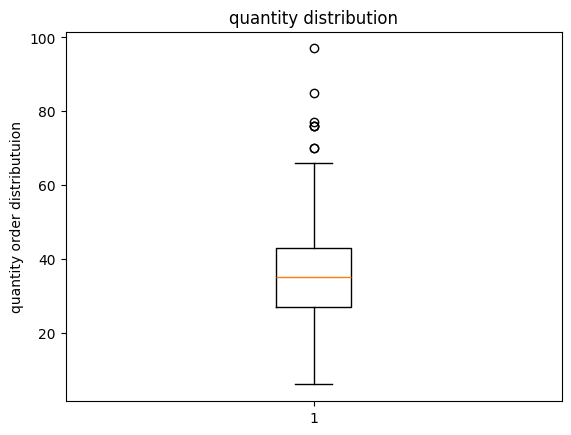

In [262]:
# box plot show outliars in 'quantityordered'
plt.boxplot(data=data,x='QUANTITYORDERED')
plt.ylabel('quantity order distributuion')
plt.title('quantity distribution')
plt.show()

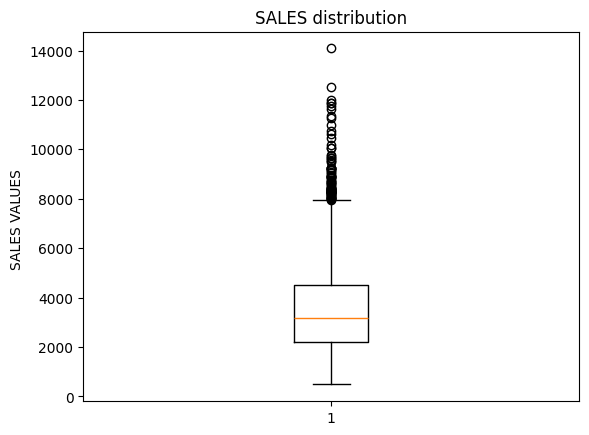

In [263]:
# box plot show outliars in 'quantityordered'
plt.boxplot(data=data,x='SALES')
plt.ylabel('SALES VALUES ')
plt.title('SALES distribution')
plt.show()

In [330]:
#remove outliar from sales column
data=data[data['SALES'] < 12000]
data.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE,REVENUE,MONTHNAME
ORDERNUMBER,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,USA,missing,Small,2871.00,February
10121,34,81.35,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,missing,France,EMEA,Small,2765.90,May
10134,41,94.74,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,missing,France,EMEA,Medium,3884.34,July
10145,45,83.26,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,USA,missing,Medium,3746.70,August
10159,49,100.00,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,USA,missing,Medium,4900.00,October


In [274]:
#date range
print(min(data['ORDERDATE']),
max(data['ORDERDATE']))
'''sales dataset was collected from 1st-Jan-2023 to 5-May-2005.'''

2003-01-06 00:00:00 2005-05-31 00:00:00


Text(0.5, 1.0, 'top 5 countries by highest number of order')

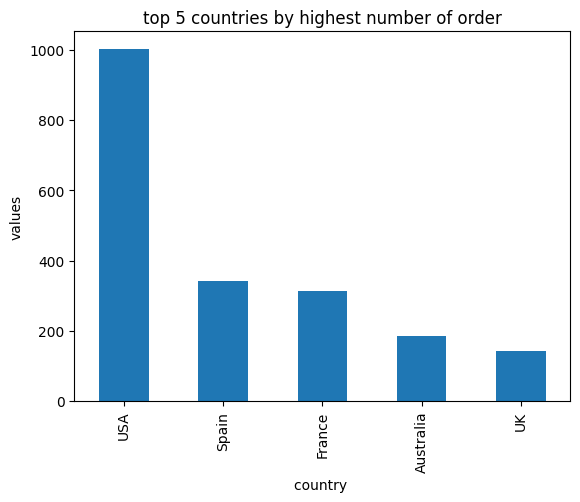

In [287]:
#top 5 countries with the highest number of orders
data['COUNTRY'].unique()
data.groupby('COUNTRY')['QUANTITYORDERED'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.xlabel('country ')
plt.ylabel('values')
plt.title('top 5 countries by highest number of order')
'''USE,SPAIN,FRANCE,AUSTRALIA,UK'''

In [352]:
#product line has the most orders
data['PRODUCTLINE'].unique()
most_demanded_product=data.groupby('PRODUCTLINE')['QUANTITYORDERED'].count().sort_values(ascending=False).head(1)
print(most_demanded_product)

PRODUCTLINE
Classic Cars    966
Name: QUANTITYORDERED, dtype: int64


'Classic CARS is most demanded product.'

In [ ]:
PRODUCTLINE
Classic Cars        966
Vintage Cars        605
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77

In [302]:
#total revenure
data['REVENURE'] = data['PRICEEACH'] * data['QUANTITYORDERED']
data.rename(columns={'REVENURE':'REVENUE'},inplace=True)
total_revenue=sum(data['REVENUE'])
print(total_revenue) #8273286.79

8273286.79


In [329]:
# month had the highest total sales
data['MONTHNAME']=data['ORDERDATE'].dt.month_name()
pd.pivot_table(data=data,index=['YEAR_ID','MONTHNAME'],values='SALES',aggfunc="sum").sort_values(by='SALES',ascending=False).head(2)
# year 2004 november sale is highest, 2nd highest sale is 2003 november

,,SALES
YEAR_ID,MONTHNAME,
2004,November,1076511.51
2003,November,1029837.66


		            
YEAR_ID	MONTHNAME	SALES
2004	November	1076511.51
2003	November	1029837.66


In [341]:
# unique customers 
data['CUSTOMERNAME'].nunique() 
'''92 uniue customers'''
# Are there any duplicate customer names 
print(data['CUSTOMERNAME'].duplicated().value_counts())
'''2728 duplicate customers name'''

CUSTOMERNAME
True     2728
False      92
Name: count, dtype: int64


'2820 duplicate customers name'

In [342]:
# What is the distribution of order status 
order_status= data['STATUS'].value_counts(normalize=True)

STATUS
Shipped       0.927660
Cancelled     0.021277
Resolved      0.016667
On Hold       0.015248
In Process    0.014184
Disputed      0.004965
Name: proportion, dtype: float64

###  Distribution of Order Status

The dataset shows the proportion of each order status:

| Status       | Percentage   |
|--------------|--------------|
| **Shipped**       | 92.77%       |
| **Cancelled**     | 2.13%        |
| **Resolved**      | 1.67%        |
| **On Hold**       | 1.52%        |
| **In Process**    | 1.42%        |
| **Disputed**      | 0.50%        |

Most orders (over 92%) are **successfully shipped**, indicating a strong fulfillment rate.  
Very few orders are cancelled, on hold, or disputed — showing good operational efficiency.


In [350]:
#customer placed the largest order (by revenue)
customer_place_largest_order=data.groupby('CUSTOMERNAME')['REVENUE'].sum().sort_values(ascending=False).head(1)
print(customer_place_largest_order)
'''Euro Shopping Channel    761195.05'''

CUSTOMERNAME
Euro Shopping Channel    761195.05
Name: REVENUE, dtype: float64


'Euro Shopping Channel    761195.05'

In [348]:
#the most frequently ordered product
data['PRODUCTLINE'].value_counts(normalize=True)

PRODUCTLINE
Classic Cars        0.342553
Vintage Cars        0.214539
Motorcycles         0.117376
Planes              0.108511
Trucks and Buses    0.106738
Ships               0.082979
Trains              0.027305
Name: proportion, dtype: float64

PRODUCTLINE
Classic Cars        0.342553
Vintage Cars        0.214539
Motorcycles         0.117376
Planes              0.108511
Trucks and Buses    0.106738
Ships               0.082979
Trains              0.027305
Name: proportion, dtype: float64


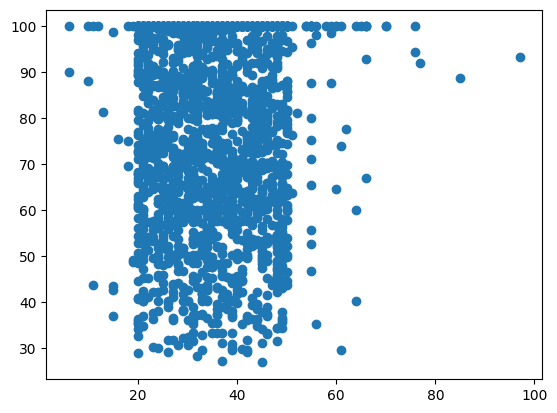

In [353]:
#1. Are there any trends between order quantity and unit price?
plt.scatter(x=data['QUANTITYORDERED'],y=data['PRICEEACH'])

###  Relationship Between Quantity and Unit Price

There is **no clear correlation** between quantity ordered and unit price.  
The scatter plot shows that quantities ranging from **20 to 40** have **widely varying prices** between **0 and 100**.  
This indicates that **product price does not depend on quantity**, and there is **no consistent trend** between the two.


In [354]:
# How many products were sold per product line?
data.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()

PRODUCTLINE
Classic Cars        33942
Motorcycles         11663
Planes              10727
Ships                8127
Trains               2712
Trucks and Buses    10777
Vintage Cars        20943
Name: QUANTITYORDERED, dtype: int64

### Total Products Sold per Product Line

This table shows the total number of products sold in each product line based on the `QUANTITYORDERED`.

| Product Line        | Quantity Sold |
|---------------------|---------------|
| Classic Cars        | 33,942        |
| Vintage Cars        | 20,943        |
| Motorcycles         | 11,663        |
| Trucks and Buses    | 10,777        |
| Planes              | 10,727        |
| Ships               | 8,127         |
| Trains              | 2,712         |

- **Classic Cars** are the top-selling product line by a significant margin.  
- **Trains** have the least number of sales.  



In [379]:
# Which territories  had the most sales?
pd.pivot_table(data=data,index='TERRITORY',values='SALES',aggfunc='sum').sort_values(by='SALES',ascending=False)

,SALES
TERRITORY,
EMEA,4967271.41
missing,3825442.09
APAC,746121.83
Japan,455173.22


	SALES
TERRITORY	
EMEA	4967271.41
missing	3825442.09
APAC	746121.83
Japan	455173.22


 Summary: Sales Data Analysis (Jan 2003 – May 2005)
This project involved analyzing a sales dataset containing 2,823 rows and 24 columns, covering transactions from January 2003 to May 2005.

1. Top-selling product: Classic Cars
2. Lowest-selling product: Trains
3. Key importing region: EMEA (Europe, Middle East, and Africa)
4. Note: Data for the second most important importer appears to be missing or incomplete.

5. Highest monthly revenue:

    November 2004: $1,076,511.51

    November 2003: $1,029,837.66

6. Top customer by revenue: Euro Shopping Channel, contributing $761,195.05 in total orders.

7. Order shipment performance:

Around 92% of orders were shipped on time, indicating strong operational efficiency.
